#Import Libraries

In [196]:
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM

#Analyze Data

In [197]:
quote = 'BTC-USD'
df = web.DataReader(quote, data_source='yahoo', start='2010-01-01', end='2021-06-14')
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-10,37608.695312,36044.449219,36697.031250,37334.398438,3.869974e+10,37334.398438
2021-06-11,37408.925781,34728.191406,37340.144531,35552.515625,3.792423e+10,35552.515625
2021-06-12,39322.781250,34864.109375,35555.789062,39097.859375,4.066911e+10,39097.859375
2021-06-13,40978.363281,38757.285156,39016.968750,40218.476562,4.314891e+10,40218.476562
2021-06-14,41295.269531,39609.468750,40427.167969,40406.269531,4.642015e+10,40406.269531


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2460 entries, 2014-09-16 to 2021-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2460 non-null   float64
 1   Low        2460 non-null   float64
 2   Open       2460 non-null   float64
 3   Close      2460 non-null   float64
 4   Volume     2460 non-null   float64
 5   Adj Close  2460 non-null   float64
dtypes: float64(6)
memory usage: 134.5 KB


In [199]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2460.000000,2460.000000,2460.000000,2460.000000,2.460000e+03,2460.000000
mean,7967.391495,7500.158959,7744.175970,7759.225858,1.273501e+10,7759.225858
std,12161.288106,11349.170960,11786.528671,11801.607791,1.978028e+10,11801.607791
min,211.731003,171.509995,176.897003,178.102997,5.914570e+06,178.102997
25%,468.121758,456.394005,463.222504,463.292496,6.895322e+07,463.292496
50%,4422.214844,4203.050049,4346.395020,4359.169922,4.054475e+09,4359.169922
75%,9378.066406,9061.695068,9236.381348,9240.397461,1.896922e+10,9240.397461
max,64863.097656,62208.964844,63523.753906,63503.457031,3.509679e+11,63503.457031


Get the Dimension of the Dataset

In [200]:
df.shape

(2460, 6)

Visualise the Closing Price History


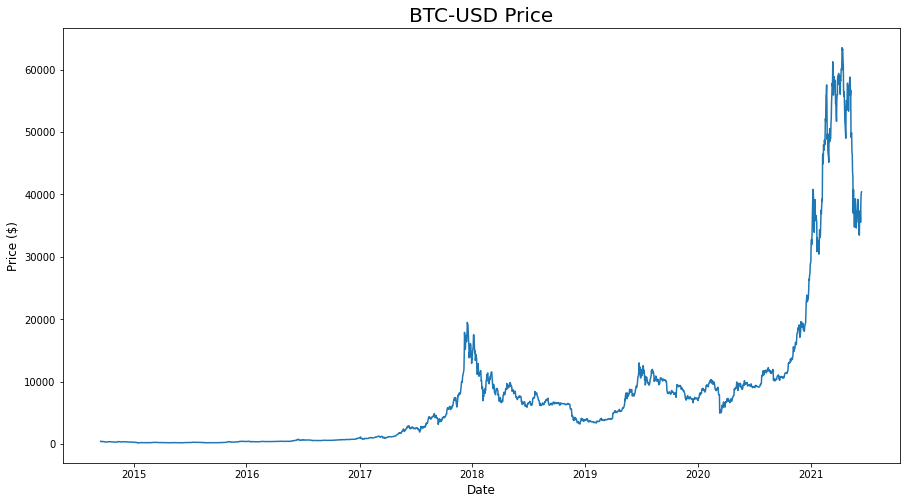

In [201]:
plt.figure(figsize=(15,8))
plt.title(quote + ' Price', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.plot(df['Close'])

Visualise Trading Volume

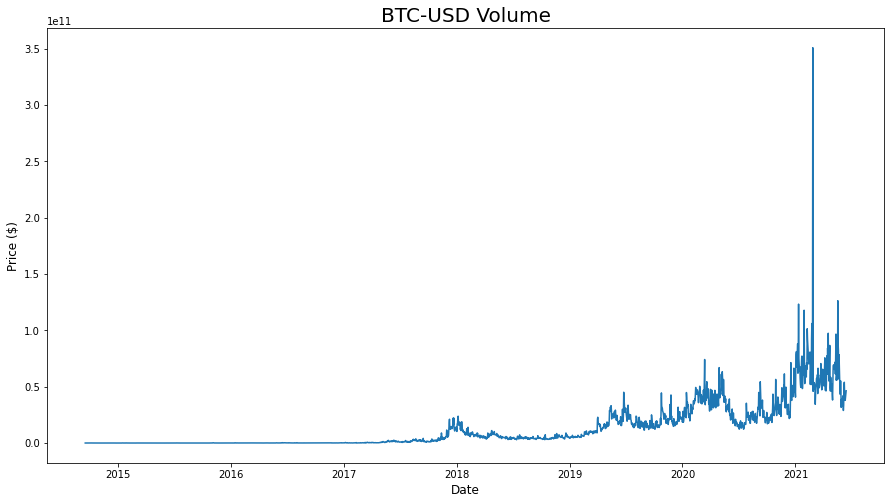

In [202]:
plt.figure(figsize=(15,8))
plt.title(quote + ' Volume', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.plot(df['Volume'])

# Data Preprocessing




Normalize Data with MinMaxScaler to set Price Values Between 0 and 1

In [203]:
normalized_data = df.copy()
normalized_data = normalized_data.drop(['Close', 'Volume'], axis=1)
normalized_data.rename(columns={'Adj Close': 'Close'}, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data['Open'] = scaler.fit_transform(normalized_data['Open'].values.reshape(-1, 1))
normalized_data['High'] = scaler.fit_transform(normalized_data['High'].values.reshape(-1, 1))
normalized_data['Low'] = scaler.fit_transform(normalized_data['Low'].values.reshape(-1, 1))
normalized_data['Close'] = scaler.fit_transform(normalized_data['Close'].values.reshape(-1, 1))

normalized_data.tail(5)

,High,Low,Open,Close
Date,,,,
2021-06-10,0.578440,0.578246,0.576511,0.586752
2021-06-11,0.575350,0.557029,0.586663,0.558614
2021-06-12,0.604953,0.559220,0.558495,0.614600
2021-06-13,0.630561,0.621975,0.613133,0.632296
2021-06-14,0.635463,0.635712,0.635395,0.635262


Split Training, Validation and Testing Dataset (80% Train, 10 Validation and 10% Test Data)

In [204]:
train_data_percentage = 80
valid_data_percentage = 10
test_data_percentage = 10
  
valid_data_len = int(np.round(valid_data_percentage/100*normalized_data.shape[0]))
test_data_len = int(np.round(test_data_percentage/100*normalized_data.shape[0]))
train_data_len = int(normalized_data.shape[0] - (valid_data_len + test_data_len))

X_train = normalized_data[:train_data_len,:-1,:]
y_train = normalized_data[:train_data_len,-1,:]

X_valid = normalized_data[train_data_len:train_data_len+valid_data_len,:-1,:]
y_valid = normalized_data[train_data_len:train_data_len+valid_data_len,-1,:]

X_test = normalized_data[train_data_len+valid_data_len:,:-1:]
y_test = normalized_data[train_data_len+valid_data_len:,-1,:]

print(X_train)

train_valid_test_split(scaled_price)

TypeError: ignored

# Building the LSTM Model Using Sequential API

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True))